Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../../data/philosopher/3/'

N = 1_000
M = 10_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}3/philosopher_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}3/philosopher_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}3/philosopher_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}3/philosopher_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [3]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 21:35:18 2025 +0200) (511.53ms ela...,0.1350,0.0000,0.351,0.44,0.06,3.61,58.74 C,Nominal
1,(Tue Apr 15 21:35:18 2025 +0200) (508.94ms ela...,1.1500,0.0332,0.371,1.35,0.21,18.72,58.74 C,Nominal
2,(Tue Apr 15 21:35:19 2025 +0200) (507.59ms ela...,0.1110,0.0000,0.269,0.17,0.06,4.03,58.81 C,Nominal
3,(Tue Apr 15 21:35:19 2025 +0200) (508.89ms ela...,0.0446,0.0000,0.262,0.09,0.03,2.22,58.81 C,Nominal
4,(Tue Apr 15 21:35:20 2025 +0200) (509.89ms ela...,0.0700,0.0000,0.257,0.12,0.03,2.43,58.52 C,Nominal


In [4]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(100, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 21:35:30 2025 +0200) (1008.16ms el...,34.6,0.0,0.903,35.47,3.91,98.64,58.28 C,Nominal
1,(Tue Apr 15 21:35:31 2025 +0200) (1006.76ms el...,33.7,0.0,0.420,34.30,3.88,98.22,61.51 C,Nominal
2,(Tue Apr 15 21:35:32 2025 +0200) (1005.80ms el...,35.5,0.0,0.793,36.31,3.97,99.45,64.41 C,Nominal
3,(Tue Apr 15 21:35:33 2025 +0200) (1005.79ms el...,33.3,0.0,0.418,33.96,3.93,98.76,66.38 C,Nominal
4,(Tue Apr 15 21:35:34 2025 +0200) (1006.44ms el...,33.6,0.0,0.412,34.19,3.91,98.46,68.26 C,Nominal


In [5]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 21:25:12 2025 +0200) (510.33ms ela...,0.1380,0.0000,0.261,0.21,0.05,4.04,53.70 C,Nominal
1,(Tue Apr 15 21:25:13 2025 +0200) (508.93ms ela...,1.2900,0.0335,0.349,1.51,0.25,20.51,53.74 C,Nominal
2,(Tue Apr 15 21:25:13 2025 +0200) (508.00ms ela...,0.0774,0.0000,0.261,0.13,0.04,3.01,53.74 C,Nominal
3,(Tue Apr 15 21:25:14 2025 +0200) (508.02ms ela...,0.0673,0.0000,0.263,0.11,0.03,2.32,53.71 C,Nominal
4,(Tue Apr 15 21:25:14 2025 +0200) (509.67ms ela...,0.0601,0.0000,0.274,0.10,0.04,2.57,53.71 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(341, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 21:25:24 2025 +0200) (1007.75ms el...,27.7,0.0000,0.470,28.37,3.83,97.66,56.04 C,Nominal
1,(Tue Apr 15 21:25:25 2025 +0200) (1005.07ms el...,27.3,0.0000,0.427,27.86,3.77,97.29,58.50 C,Nominal
2,(Tue Apr 15 21:25:26 2025 +0200) (1004.90ms el...,27.6,0.0000,0.437,28.25,3.81,97.70,60.64 C,Nominal
3,(Tue Apr 15 21:25:27 2025 +0200) (1005.41ms el...,28.3,0.0362,0.605,29.07,3.76,96.42,62.47 C,Nominal
4,(Tue Apr 15 21:25:28 2025 +0200) (1004.71ms el...,28.1,0.0000,0.449,28.76,3.85,97.88,64.55 C,Nominal


Clean the Data

In [7]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [8]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [9]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 21:35:18,0.1350,0.0000,0.351,0.44,0.06,3.61,58.74,Nominal,511.53
1,2025-04-15 21:35:18,1.1500,0.0332,0.371,1.35,0.21,18.72,58.74,Nominal,508.94
2,2025-04-15 21:35:19,0.1110,0.0000,0.269,0.17,0.06,4.03,58.81,Nominal,507.59
3,2025-04-15 21:35:19,0.0446,0.0000,0.262,0.09,0.03,2.22,58.81,Nominal,508.89
4,2025-04-15 21:35:20,0.0700,0.0000,0.257,0.12,0.03,2.43,58.52,Nominal,509.89


In [10]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(100, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 21:35:30,34.6,0.0,0.903,35.47,3.91,98.64,58.28,Nominal,1008.16
1,2025-04-15 21:35:31,33.7,0.0,0.420,34.30,3.88,98.22,61.51,Nominal,1006.76
2,2025-04-15 21:35:32,35.5,0.0,0.793,36.31,3.97,99.45,64.41,Nominal,1005.80
3,2025-04-15 21:35:33,33.3,0.0,0.418,33.96,3.93,98.76,66.38,Nominal,1005.79
4,2025-04-15 21:35:34,33.6,0.0,0.412,34.19,3.91,98.46,68.26,Nominal,1006.44


In [11]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 21:25:12,0.1380,0.0000,0.261,0.21,0.05,4.04,53.70,Nominal,510.33
1,2025-04-15 21:25:13,1.2900,0.0335,0.349,1.51,0.25,20.51,53.74,Nominal,508.93
2,2025-04-15 21:25:13,0.0774,0.0000,0.261,0.13,0.04,3.01,53.74,Nominal,508.00
3,2025-04-15 21:25:14,0.0673,0.0000,0.263,0.11,0.03,2.32,53.71,Nominal,508.02
4,2025-04-15 21:25:14,0.0601,0.0000,0.274,0.10,0.04,2.57,53.71,Nominal,509.67


In [12]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(341, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 21:25:24,27.7,0.0000,0.470,28.37,3.83,97.66,56.04,Nominal,1007.75
1,2025-04-15 21:25:25,27.3,0.0000,0.427,27.86,3.77,97.29,58.50,Nominal,1005.07
2,2025-04-15 21:25:26,27.6,0.0000,0.437,28.25,3.81,97.70,60.64,Nominal,1004.90
3,2025-04-15 21:25:27,28.3,0.0362,0.605,29.07,3.76,96.42,62.47,Nominal,1005.41
4,2025-04-15 21:25:28,28.1,0.0000,0.449,28.76,3.85,97.88,64.55,Nominal,1004.71


Visualize the Data

In [13]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


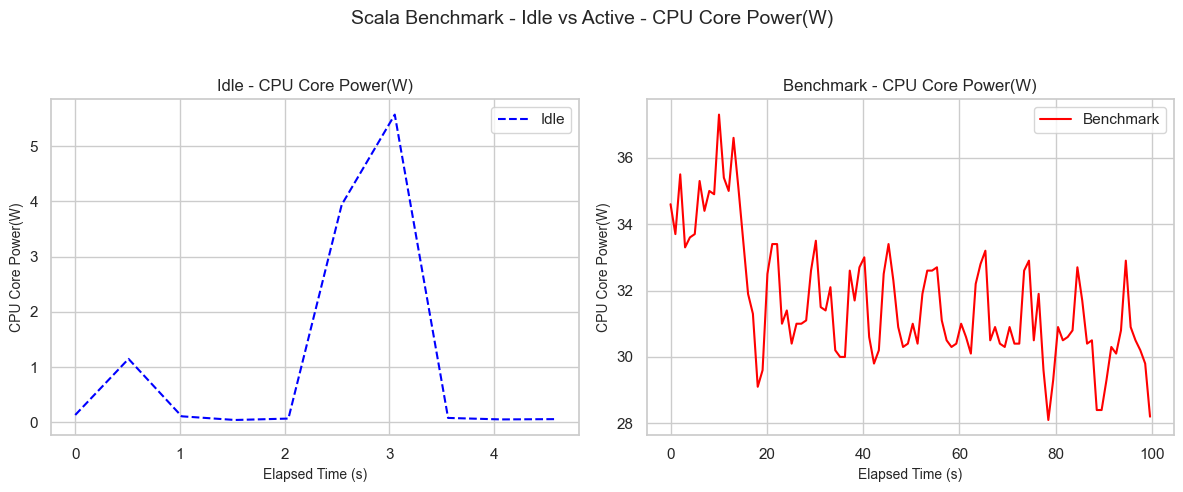

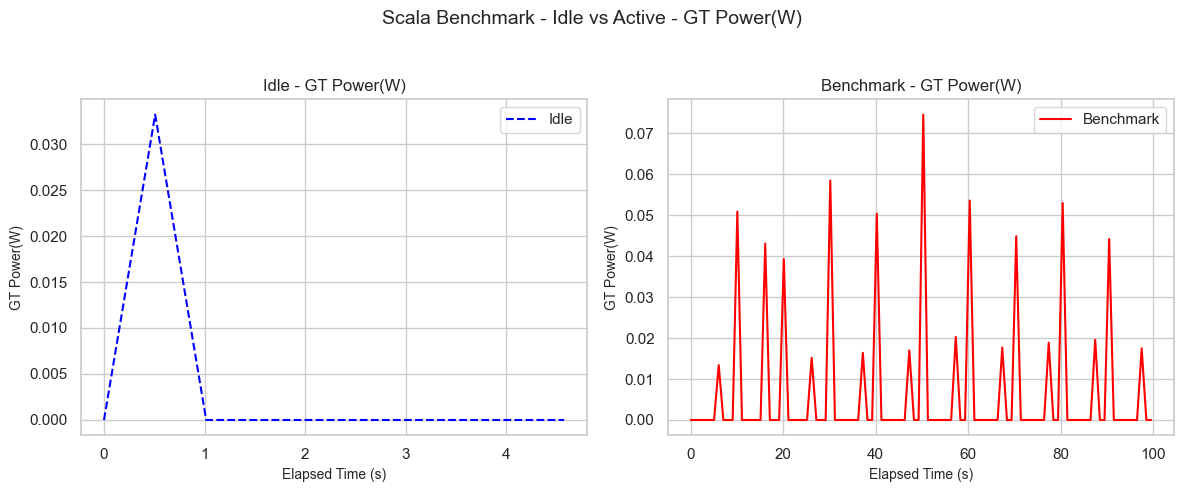

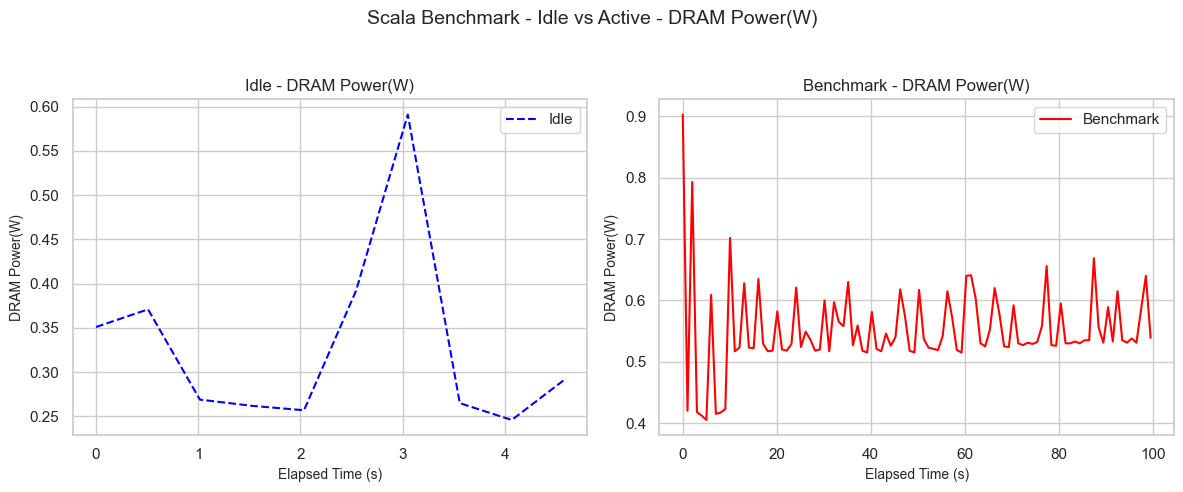

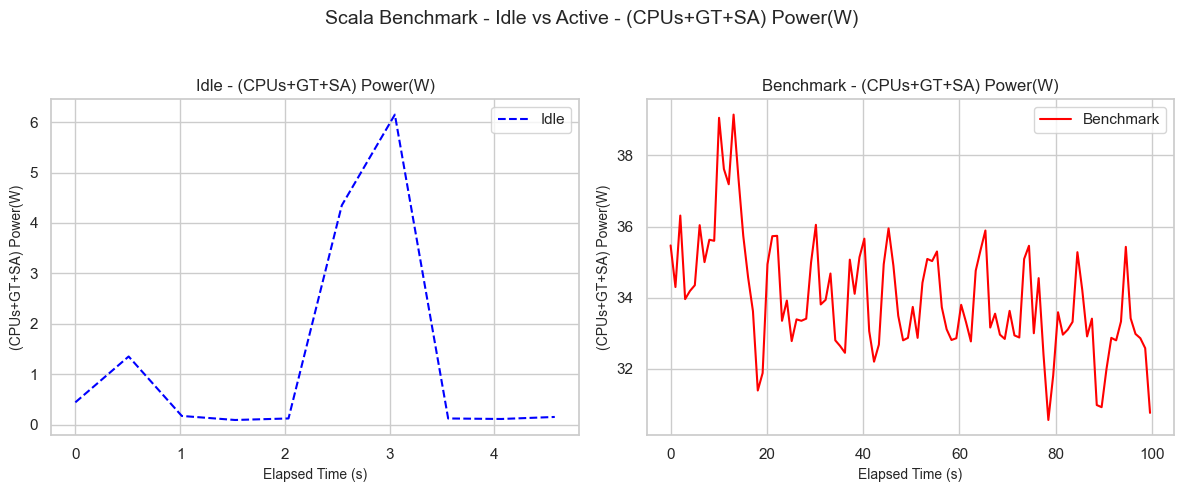

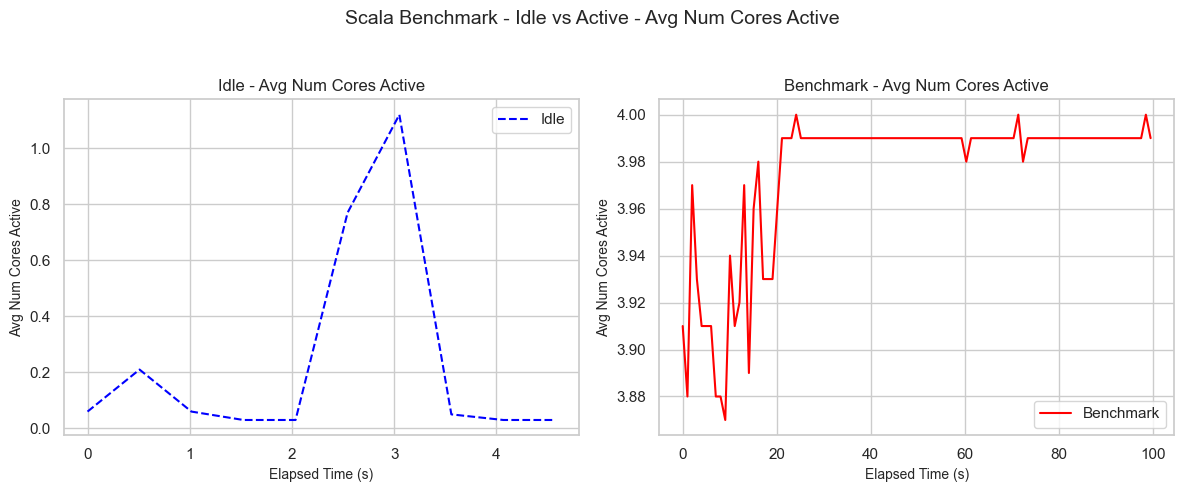

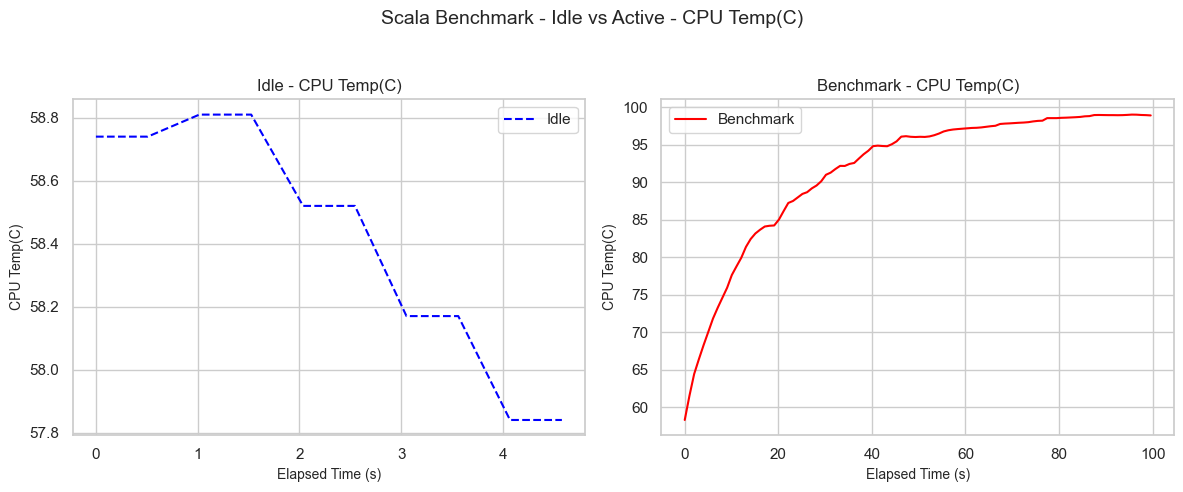

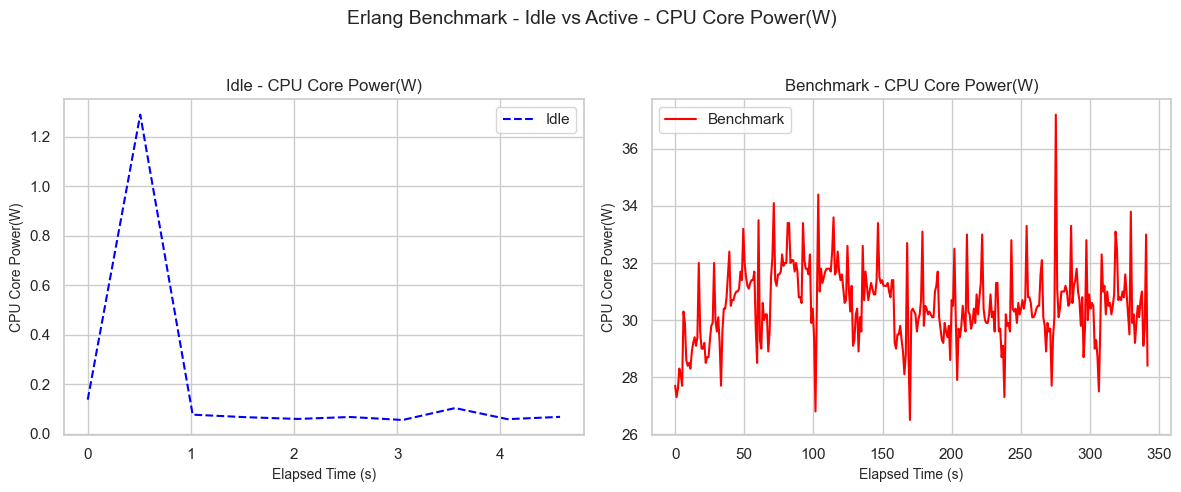

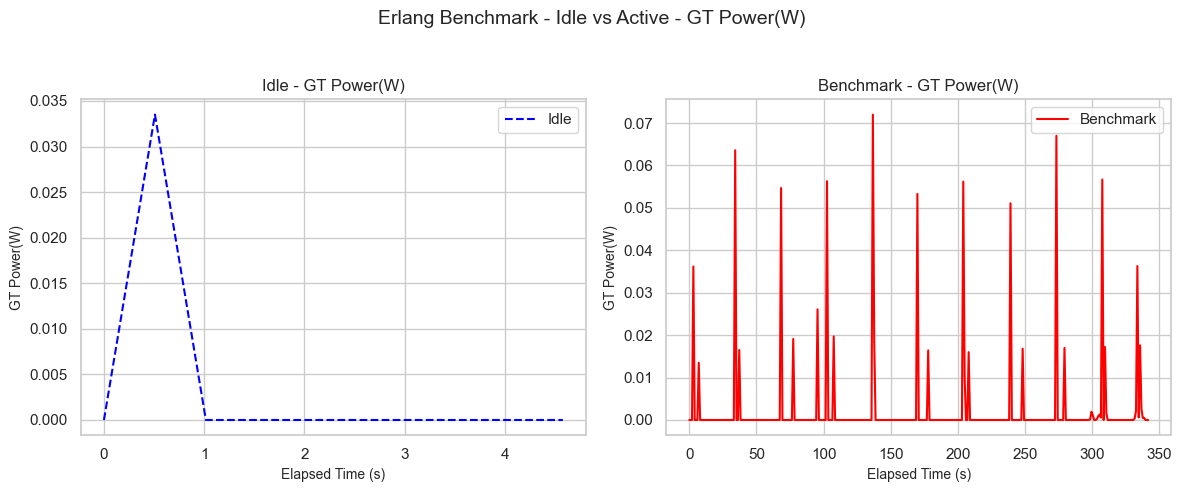

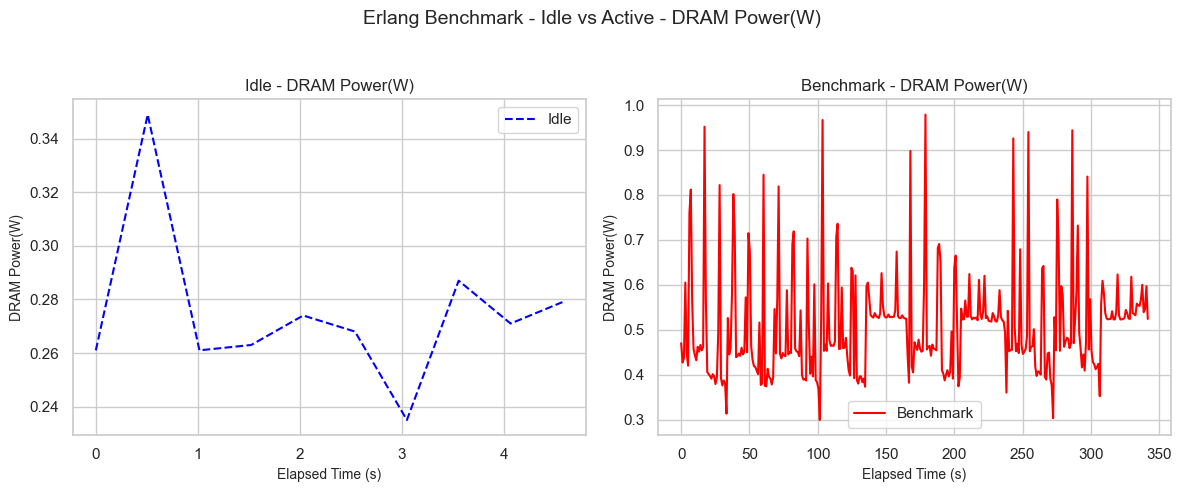

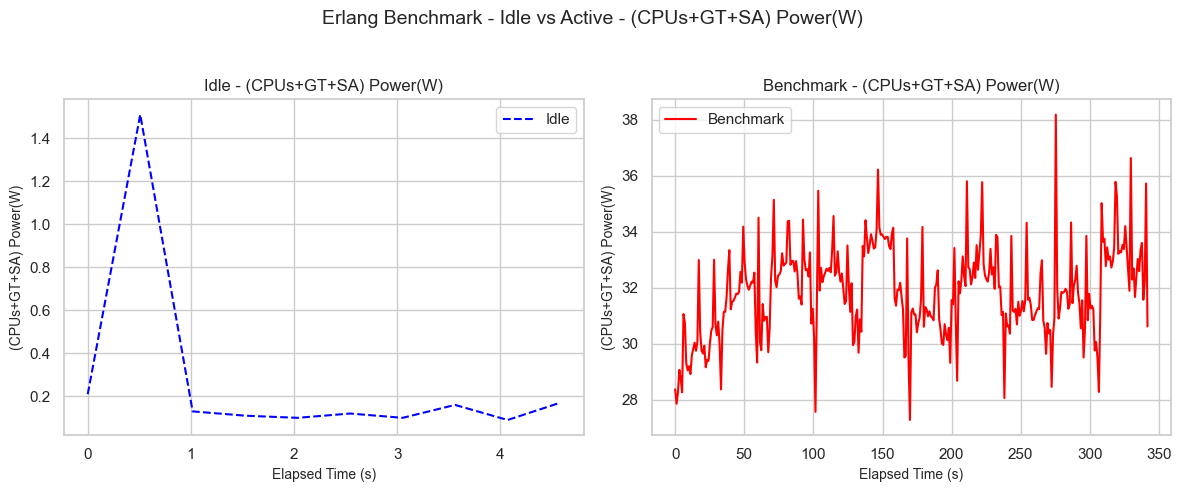

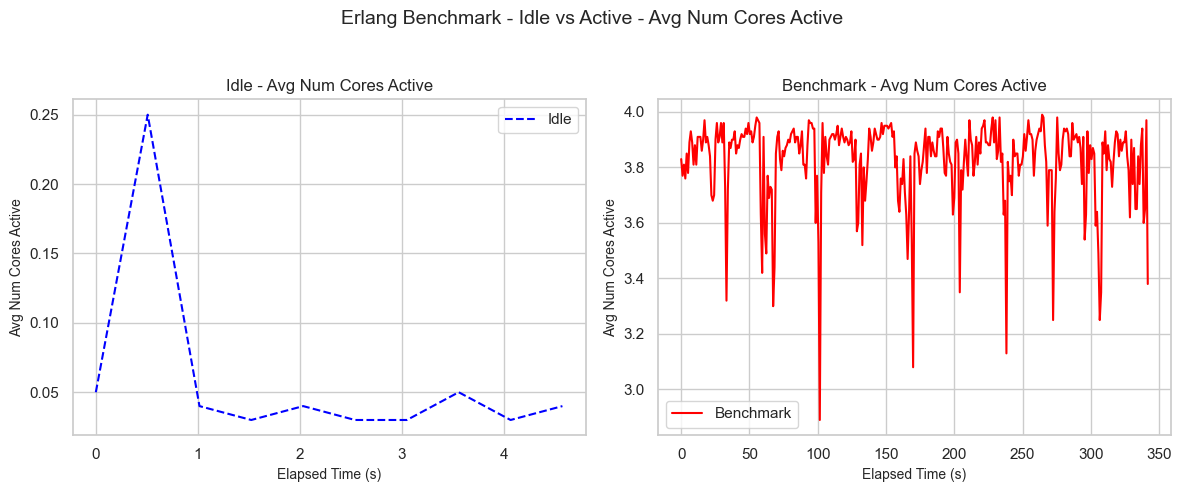

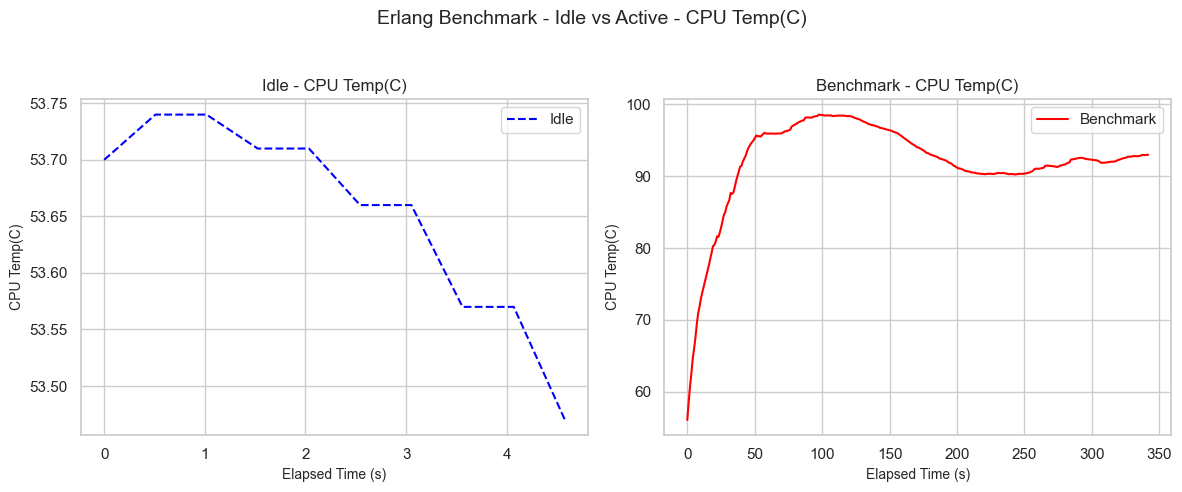

In [14]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [15]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        # ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [16]:
def format_number_str(num):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if num >= 1_000_000_000:
        return f"{num // 1_000_000_000}B"
    elif num >= 1_000_000:
        return f"{num // 1_000_000}M"
    elif num >= 1_000:
        return f"{num // 1_000}K"
    return str(num)

n = format_number_str(N)
m = format_number_str(M)
title_config_prefix = f"({n} Philosophers, {m} Eating Rounds, {ITERATIONS} Iterations)"

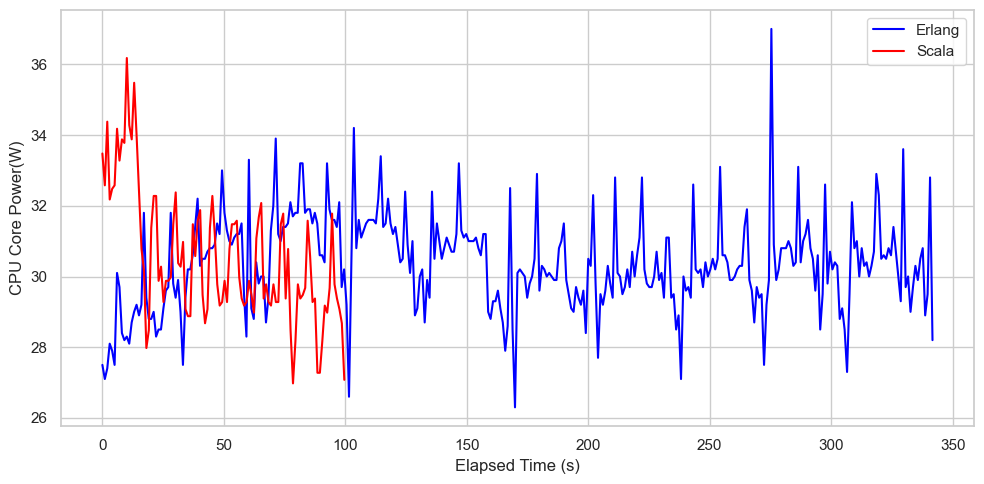

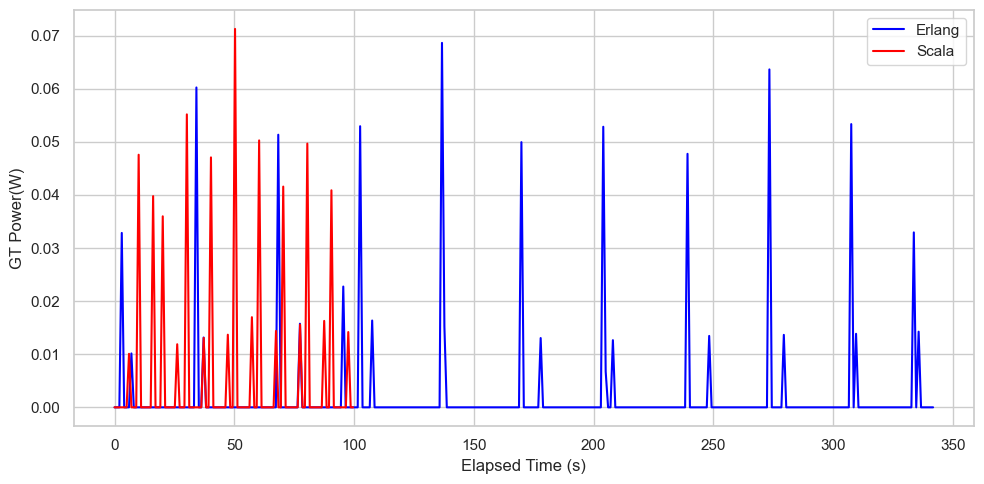

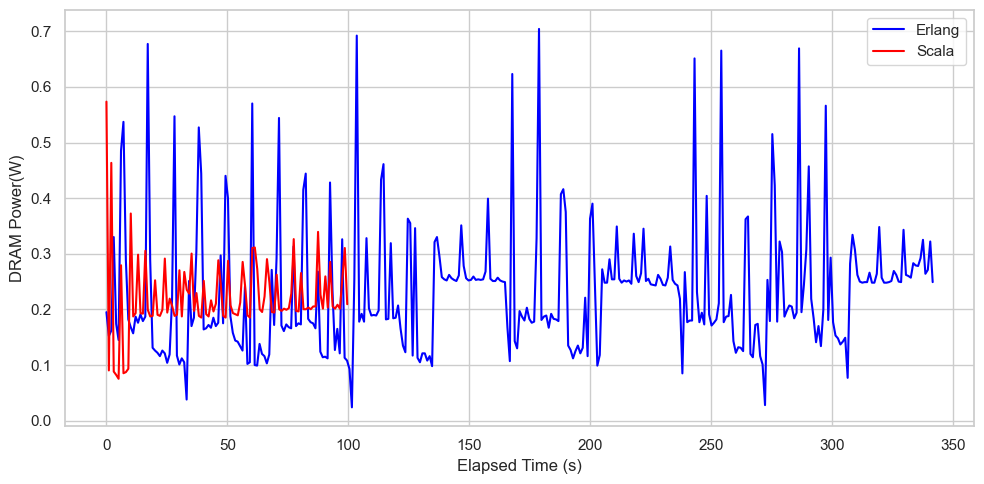

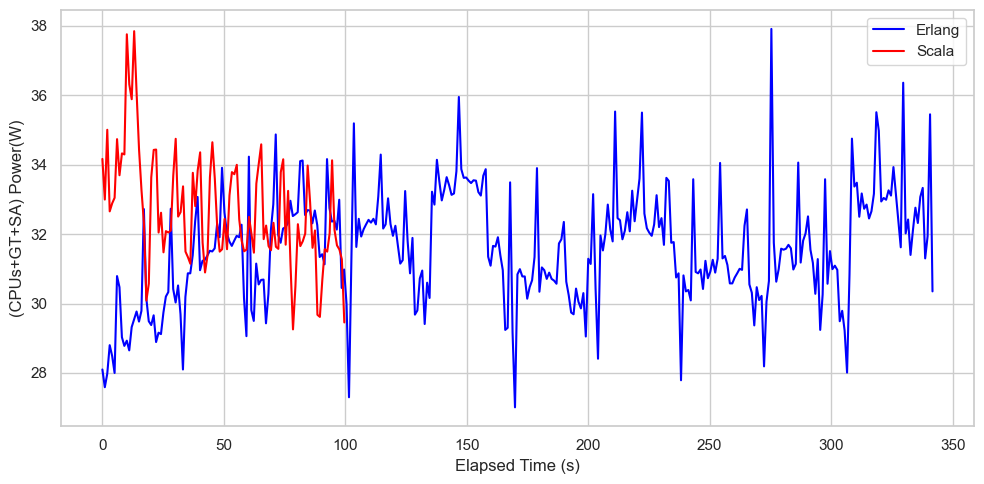

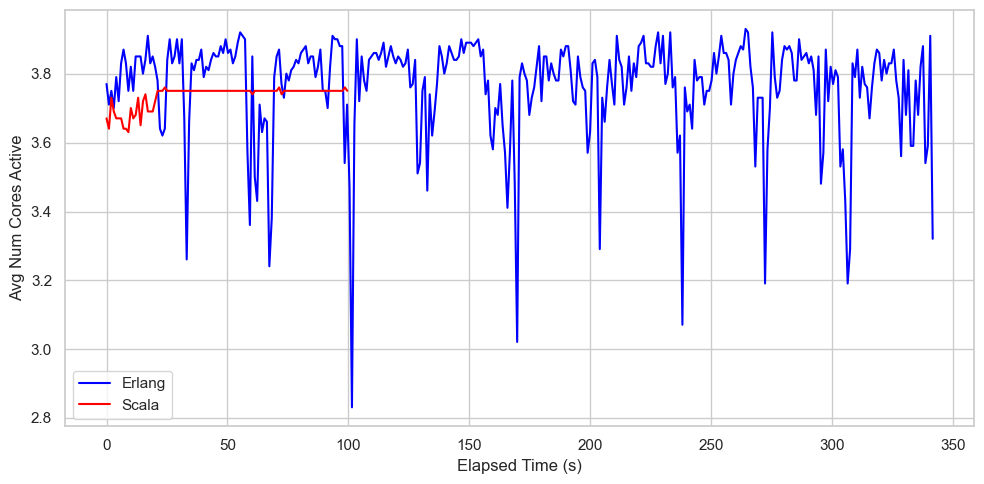

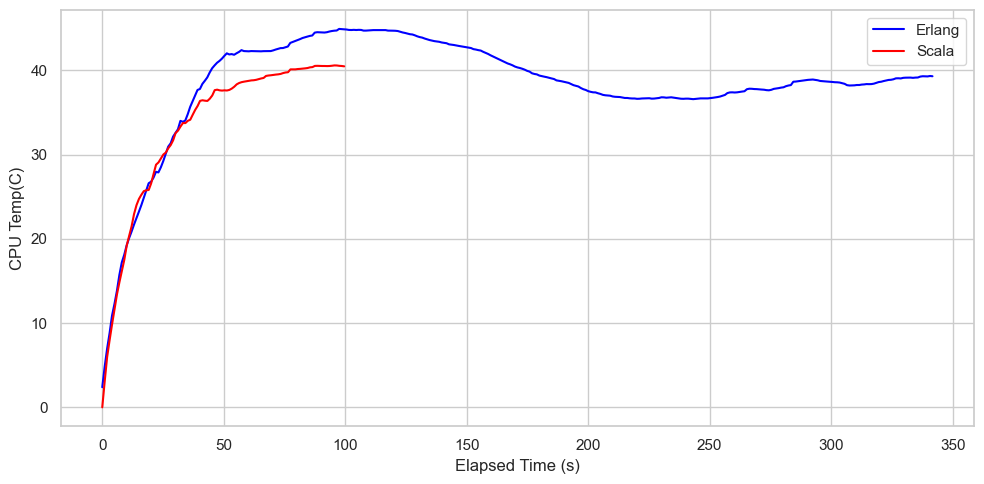

In [17]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Philosopher Benchmark {title_config_prefix}")


Compute Average Metrics

In [18]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [19]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.535310
GT Power(W)               0.003365
DRAM Power(W)             0.222460
(CPUs+GT+SA) Power(W)    32.681500
CPU Temp(C)              33.207800
Avg Num Cores Active      3.736900
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        30.355119
GT Power(W)              -0.000879
DRAM Power(W)             0.231657
(CPUs+GT+SA) Power(W)    31.584633
CPU Temp(C)              38.355592
Avg Num Cores Active      3.766279
dtype: float64


Compute Total Energy Consumption

In [20]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "M": M,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy,
    "Erlang Total Time(s)": erlang_total_time,
    "Scala Total Time(s)": scala_total_time,
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["M"] == M) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "M =", M, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/philosopher/3/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 3093.8167396827 Joules
Erlang Benchmark: 10481.755189922651 Joules
